In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import pi, cos, sin # used for HoF
from scipy.ndimage import uniform_filter # used for hoF
from numpy.lib.scimath import sqrt # used for hoF
from numpy import arctan2 # used for hoF

from sklearn import svm

import math
import numpy as np
import datetime as dt
from collections import deque
import pandas as pd
 
from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import tensorflow as tf
# Check GPU coinfiguration in Colab
print("Tensorflow version: ", tf.__version__)
print(tf.test.gpu_device_name())
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

Tensorflow version:  2.12.0
/device:GPU:0


In [ ]:
# Change working directory to be current folder
import os
os.chdir('/content/drive/MyDrive/MTech AI NUS/PM ITSS/')
!ls
directoryName = 'Dataset_flight'

'2D_CNN Model -Diving Dataset.ipynb'
'C3D Model - Diving Dataset.ipynb'
 Dataset
 Dataset_flight
 model_2D1.csv
 model_2D1.h5
 model_2D.csv
 model_2D.h5
 model_c3d.csv
 model_c3d.h5
 model_flightClassify_2D_1.csv
 model_flightClassify_2D_1.h5
 model_flightClassify_2D_2.csv
 model_flightClassify_2D_2.h5
 model_flightClassify_2D_3.csv
 model_flightClassify_2D_3.h5
 model_flightClassify_2D_4.csv
 model_flightClassify_2D_4.h5
 model_flightClassify_2D_5.csv
 model_flightClassify_2D_5.h5
 model_flightClassify_2D.csv
 model_flightClassify_2D.h5
 Temporal_segmentation_final_pipeline.ipynb
 VIDEO


In [ ]:
dive_action_labels  = sorted(os.listdir("Dataset_flight"))
print("Dive labels: ", dive_action_labels)

Dive labels:  ['Somersault', 'Twist']


In [ ]:
image_height, image_width = 64, 64
max_images_per_class = 10000


def extract_frames(video_path):
     frames_list = []
     video = cv2.VideoCapture(video_path)
     while True:
         _,frame = video.read()
         if not _:
             break;
         processed_frame = cv2.resize(frame, (image_height, image_width))/255
         frames_list.append(processed_frame)
     video.release()
     return frames_list
         

def create_dataset():
    features = []
    labels = []
    temp_frames = []

    for index, className in enumerate(dive_action_labels):
        print(f'Extracting Data of Class: {className}')
        files_list = os.listdir(os.path.join(directoryName, className))
        for file_name in files_list:
            video_path = os.path.join(directoryName, className, file_name)
            frames = extract_frames(video_path)
            temp_frames.extend(frames)

        features.extend(random.sample(temp_frames, max_images_per_class))
        labels.extend([index] * max_images_per_class)
        temp_frames.clear()
    features = np.asarray(features)
    labels = np.array(labels)
    return features,labels

In [ ]:
features, labels = create_dataset()

Extracting Data of Class: Somersault
Extracting Data of Class: Twist


In [ ]:
ohe_labels = to_categorical(labels)
x_train, x_val, y_train, y_val = train_test_split(features, ohe_labels, test_size = 0.3, shuffle = True, random_state = 100)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size = 0.2, shuffle = True, random_state = 100)
print('Training Data : %d , Training Labels %d.'% (len(x_train), (len(y_train))))
print('Validation Data : %d , Validation Labels %d.'% (len(x_val), (len(y_val))))
print('Test Data : %d , Test Labels %d.'% (len(x_test), (len(y_test))))

Training Data : 14000 , Training Labels 14000.
Validation Data : 4800 , Validation Labels 4800.
Test Data : 1200 , Test Labels 1200.


Optimizer and other things constant
Model 3 

--- 1 - 64 -- 2 - 64 -- 3 - 64

Model 4

--- 1 - 64 -- 2 - 64 -- 3 - 32

Model 3 slightly better than Model 4





####**DONT TOUCH NEXT CELL**
####**MODEL 3 - best model**

In [ ]:
#Model 3
def create_model(optim):
 
    model = Sequential()
 
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation = 'softmax'))
    model.compile(loss=categorical_crossentropy, optimizer=optim, metrics=['accuracy'])
    # Printing the models summary
    model.summary()
 
    return model
 
 
# Calling the create_model method
optim = tf.keras.optimizers.Adam(0.0001)
model_CNN = create_model(optim)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 global_average_pooling2d (G  (None, 64)               0

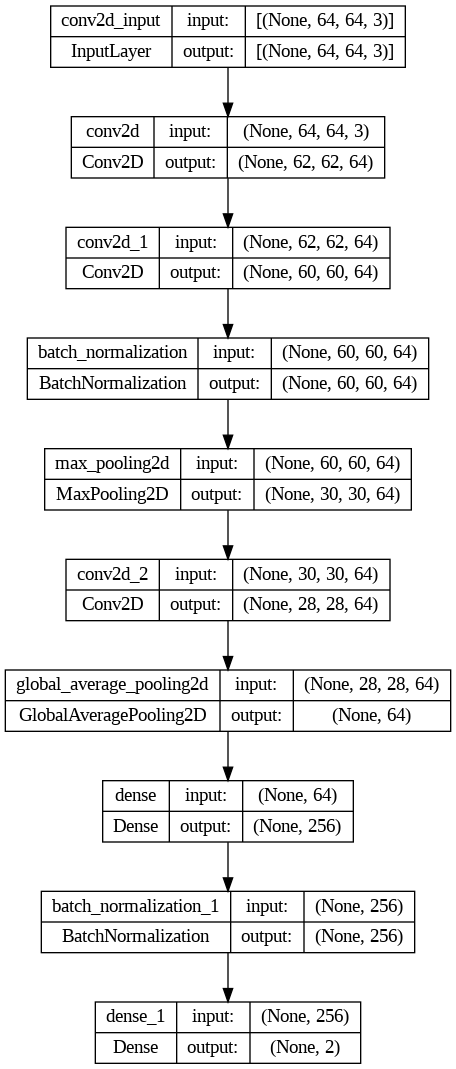

In [4]:
tf.keras.utils.plot_model(model_CNN, to_file='model_2.png', show_shapes=True,show_layer_names=True)

In [ ]:
#Model 5
# def create_model(optim):
 
#     model = Sequential()
 
#     model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
#     model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
#     #model.add(Dropout(0.3))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(GlobalAveragePooling2D())
#     model.add(Dense(216, activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(Dense(2, activation = 'softmax'))
#     model.compile(loss=categorical_crossentropy, optimizer=optim, metrics=['accuracy'])
#     # Printing the models summary
#     model.summary()
 
#     return model
 
 
# # Calling the create_model method
# optim = tf.keras.optimizers.Adam(0.0001)
# model_CNN = create_model(optim)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 conv2d_66 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization_52 (Bat  (None, 60, 60, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_53 (Bat  (None, 28, 28, 64)     

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model_flightClassify_2D_5.h5', save_best_only=True, monitor='val_accuracy', mode='max',restore_best_weights=True)

#Callback to stop training if the metric value doesnt change for 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0.0001, patience=6, mode='max',restore_best_weights=True)

csv_logger      = CSVLogger('model_flightClassify_2D_5.csv')

**MODEL 5**

In [ ]:
#Model 5
history = model_CNN.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=50, verbose=2, shuffle=True,
                          callbacks=[checkpoint,early_stop,csv_logger])

Epoch 1/50
438/438 - 11s - loss: 0.6447 - accuracy: 0.6337 - val_loss: 0.6993 - val_accuracy: 0.5696 - 11s/epoch - 25ms/step
Epoch 2/50
438/438 - 7s - loss: 0.5860 - accuracy: 0.6851 - val_loss: 0.8572 - val_accuracy: 0.5681 - 7s/epoch - 16ms/step
Epoch 3/50
438/438 - 8s - loss: 0.5487 - accuracy: 0.7164 - val_loss: 0.7915 - val_accuracy: 0.6071 - 8s/epoch - 17ms/step
Epoch 4/50
438/438 - 8s - loss: 0.5104 - accuracy: 0.7476 - val_loss: 0.6563 - val_accuracy: 0.6506 - 8s/epoch - 18ms/step
Epoch 5/50
438/438 - 7s - loss: 0.4724 - accuracy: 0.7703 - val_loss: 0.5842 - val_accuracy: 0.7054 - 7s/epoch - 16ms/step
Epoch 6/50
438/438 - 7s - loss: 0.4439 - accuracy: 0.7909 - val_loss: 0.6004 - val_accuracy: 0.7271 - 7s/epoch - 16ms/step
Epoch 7/50
438/438 - 7s - loss: 0.4093 - accuracy: 0.8174 - val_loss: 0.5575 - val_accuracy: 0.7348 - 7s/epoch - 16ms/step
Epoch 8/50
438/438 - 7s - loss: 0.3744 - accuracy: 0.8333 - val_loss: 1.6591 - val_accuracy: 0.5779 - 7s/epoch - 15ms/step
Epoch 9/50
438

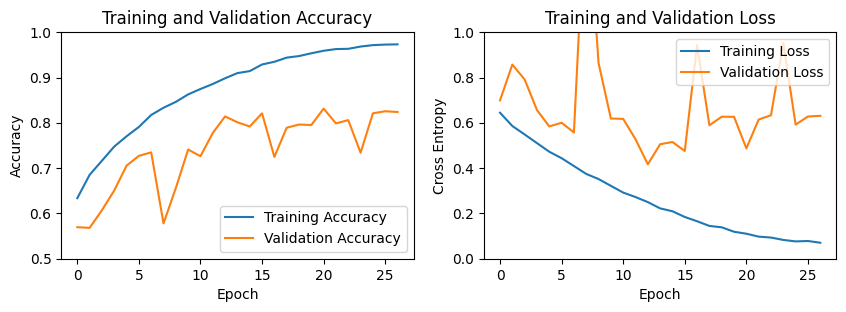

In [ ]:
#Model 5
plt.figure(figsize=(10, 10))
                
records     = pd.read_csv('model_flightClassify_2D_5.csv')
#Plotting the Accuracy:
plt.subplot(3, 2, 1)
plt.plot(records['accuracy'], label='Training Accuracy')
plt.plot(records['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

#Plotting the Loss:
plt.subplot(3, 2, 2)
plt.plot(records['loss'], label='Training Loss')
plt.plot(records['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,1])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
#Model 5
model_CNN.load_weights("model_flightClassify_2D_5.h5")
test_predictions_baseline = model_CNN.predict(x_test)
test_baseline_results = model_CNN.evaluate(x_test,y_test, verbose=0)
test_loss = test_baseline_results[0]
test_acc = (test_baseline_results[1]*100)
print('METRIC VALUES FOR TEST DATASET : \n')
print('LOSS : ', test_loss)
print('ACCURACY : ', test_acc)

38/38 [==============================] - 0s 5ms/step
METRIC VALUES FOR TEST DATASET : 

LOSS :  0.4990327060222626
ACCURACY :  82.66666531562805


In [ ]:
labelname   = ['Somersault',          # The label for reporting metrics
               'Twist']
                                                                                # Step 2
predout     = np.argmax(test_predictions_baseline,axis=1)
testout     = np.argmax(y_test,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 82.67%
              precision    recall  f1-score   support

  Somersault     0.8243    0.8158    0.8201       581
       Twist     0.8288    0.8368    0.8328       619

    accuracy                         0.8267      1200
   macro avg     0.8266    0.8263    0.8264      1200
weighted avg     0.8266    0.8267    0.8266      1200



In [ ]:
# Load the pre-trained model
model_CNN.load_weights("model_flightClassify_2D_5.h5")

# Evaluate the deep learning model
y_pred = model_CNN.predict(x_test, verbose=0)
print("Confusion matrix")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Confusion matrix
[[474 107]
 [101 518]]


**MODEL 3**

In [ ]:
#Model 3
history = model_CNN.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=50, verbose=2, shuffle=True,
                          callbacks=[checkpoint,early_stop,csv_logger])

Epoch 1/50
438/438 - 10s - loss: 0.6480 - accuracy: 0.6199 - val_loss: 0.6877 - val_accuracy: 0.5227 - 10s/epoch - 24ms/step
Epoch 2/50
438/438 - 6s - loss: 0.6136 - accuracy: 0.6503 - val_loss: 0.6645 - val_accuracy: 0.5960 - 6s/epoch - 15ms/step
Epoch 3/50
438/438 - 7s - loss: 0.5978 - accuracy: 0.6679 - val_loss: 0.6354 - val_accuracy: 0.6321 - 7s/epoch - 15ms/step
Epoch 4/50
438/438 - 6s - loss: 0.5835 - accuracy: 0.6799 - val_loss: 0.5801 - val_accuracy: 0.6862 - 6s/epoch - 15ms/step
Epoch 5/50
438/438 - 6s - loss: 0.5613 - accuracy: 0.7075 - val_loss: 0.6116 - val_accuracy: 0.6717 - 6s/epoch - 15ms/step
Epoch 6/50
438/438 - 7s - loss: 0.5556 - accuracy: 0.7039 - val_loss: 0.7934 - val_accuracy: 0.6008 - 7s/epoch - 15ms/step
Epoch 7/50
438/438 - 7s - loss: 0.5403 - accuracy: 0.7194 - val_loss: 0.5497 - val_accuracy: 0.7150 - 7s/epoch - 17ms/step
Epoch 8/50
438/438 - 6s - loss: 0.5284 - accuracy: 0.7266 - val_loss: 0.5594 - val_accuracy: 0.7198 - 6s/epoch - 15ms/step
Epoch 9/50
438

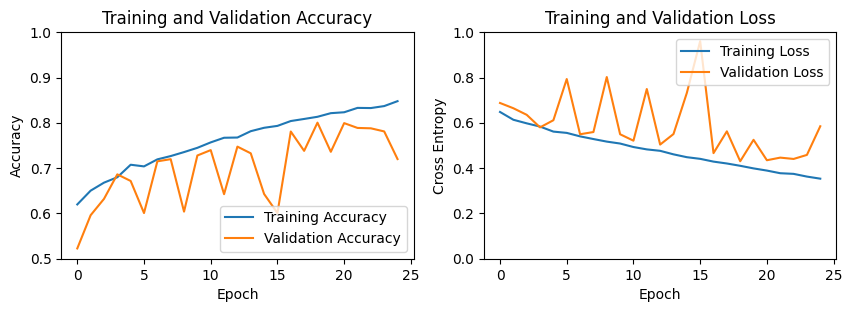

In [ ]:
plt.figure(figsize=(10, 10))
                
records     = pd.read_csv('model_flightClassify_2D_3.csv')
#Plotting the Accuracy:
plt.subplot(3, 2, 1)
plt.plot(records['accuracy'], label='Training Accuracy')
plt.plot(records['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

#Plotting the Loss:
plt.subplot(3, 2, 2)
plt.plot(records['loss'], label='Training Loss')
plt.plot(records['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,1])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
#Model 3
model_CNN.load_weights("model_flightClassify_2D_3.h5")
test_predictions_baseline = model_CNN.predict(x_test)
test_baseline_results = model_CNN.evaluate(x_test,y_test, verbose=0)
test_loss = test_baseline_results[0]
test_acc = (test_baseline_results[1]*100)
print('METRIC VALUES FOR TEST DATASET : \n')
print('LOSS : ', test_loss)
print('ACCURACY : ', test_acc)

38/38 [==============================] - 8s 7ms/step
METRIC VALUES FOR TEST DATASET : 

LOSS :  0.41099226474761963
ACCURACY :  82.58333206176758


In [ ]:
labelname   = ['Somersault',          # The label for reporting metrics
               'Twist']
                                                                                # Step 2
predout     = np.argmax(test_predictions_baseline,axis=1)
testout     = np.argmax(y_test,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 82.58%
              precision    recall  f1-score   support

  Somersault     0.8577    0.7676    0.8102       581
       Twist     0.8015    0.8805    0.8391       619

    accuracy                         0.8258      1200
   macro avg     0.8296    0.8240    0.8246      1200
weighted avg     0.8287    0.8258    0.8251      1200



In [ ]:
# Load the pre-trained model
model_CNN.load_weights("model_flightClassify_2D_3.h5")

# Evaluate the deep learning model
y_pred = model_CNN.predict(x_test, verbose=0)
print("Confusion matrix")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Confusion matrix
[[446 135]
 [ 74 545]]


**INFERENCE**

In [ ]:
# image_folder = 'VIDEO/Video_Flight_Images/04'
# video_name = 'VIDEO/video_05.avi'

# images = sorted([img for img in os.listdir(image_folder) if img.endswith(".jpg")])

# frame = cv2.imread(os.path.join(image_folder, images[0]))
# height, width, layers = frame.shape
# print(frame.shape)
# video = cv2.VideoWriter(video_name, 0, 30, (width,height))

# for image in images:
#     video.write(cv2.imread(os.path.join(image_folder, image)))

# cv2.destroyAllWindows()
# video.release()

In [ ]:
def predict(video_file_path, output_file_path, window_size):
    
    predicted_label_list = []
    predicted_labels_probabilities_deque = deque(maxlen = window_size)
 
    video_reader = cv2.VideoCapture(video_file_path)
    frame_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    print(frame_count)
 
    # Getting the width and height of the video 
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # Writing the Overlayed Video Files Using the VideoWriter Object
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 30, (original_video_width, original_video_height))
 
    while True: 
 
        # Reading The Frame
        status, frame = video_reader.read() 
 
        if not status:
            break
 
        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
         
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
 
        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model_CNN.predict(np.expand_dims(normalized_frame, axis = 0))[0]
 
        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)
 
        # Assuring that the Deque is completely filled before starting the averaging process
        if len(predicted_labels_probabilities_deque) == window_size:
 
            # Converting Predicted Labels Probabilities Deque into Numpy array
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)
            print('predicted_labels_probabilities_np : ',predicted_labels_probabilities_np)
 
            # Calculating Average of Predicted Labels Probabilities Column Wise 
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)
            print('predicted_labels_probabilities_averaged',predicted_labels_probabilities_averaged)
 
            # Converting the predicted probabilities into labels by returning the index of the maximum value.
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)
            predicted_label_list.append(predicted_label)
 
            # Accessing The Class Name using predicted label.
            predicted_class_name = dive_action_labels[predicted_label]
           
            # Overlaying Class Name Text Ontop of the Frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
 
        # Writing The Frame
        video_writer.write(frame)
 
     
    # Closing the VideoCapture and VideoWriter objects and releasing all resources held by them. 
    video_reader.release()
    video_writer.release()
    return predicted_label_list

In [ ]:
input_video_file_path = 'VIDEO/Video_Flight_Images/04/video_13_folder_1.avi'
output_video_file_path = 'VIDEO/videoFlightClassification_04.avi'
window_size = 1

predicted_label = predict(input_video_file_path, output_video_file_path, window_size)
print(predicted_label)

37
1/1 [==============================] - 0s 19ms/step
predicted_labels_probabilities_np :  [[0.34345216 0.65654784]]
predicted_labels_probabilities_averaged [0.34345216 0.65654784]
1/1 [==============================] - 0s 21ms/step
predicted_labels_probabilities_np :  [[0.4959145  0.50408554]]
predicted_labels_probabilities_averaged [0.4959145  0.50408554]
1/1 [==============================] - 0s 19ms/step
predicted_labels_probabilities_np :  [[0.07685295 0.9231471 ]]
predicted_labels_probabilities_averaged [0.07685295 0.9231471 ]
1/1 [==============================] - 0s 19ms/step
predicted_labels_probabilities_np :  [[0.20547388 0.7945261 ]]
predicted_labels_probabilities_averaged [0.20547388 0.7945261 ]
1/1 [==============================] - 0s 18ms/step
predicted_labels_probabilities_np :  [[0.2800736  0.71992636]]
predicted_labels_probabilities_averaged [0.2800736  0.71992636]
1/1 [==============================] - 0s 18ms/step
predicted_labels_probabilities_np :  [[0.22778913 

In [ ]:
print(len(predicted_label))

37


In [ ]:
s = '2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 31 | 31 | 31 | 31 | 31 | 31 | 31 | 31 | 31 | 31 | 31 | 31 | 31 | 31 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 15 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | 36 | '

In [ ]:
l = s.split('|')
print(l)
print(len([i for i,x in enumerate(l) if x == ' 31 ']))#Twist
print(len([i for i,x in enumerate(l) if x == ' 15 ']))#Somersault
#print(len([i for i,x in enumerate(l) if x == ' 5 ']))
#print(len([i for i,x in enumerate(l) if x == ' 35 ']))#Twist
print([i for i,x in enumerate(l) if x == ' 31 '])
print([i for i,x in enumerate(l) if x == ' 15 '])
#print([i for i,x in enumerate(l) if x == ' 5 '])
#print([i for i,x in enumerate(l) if x == ' 35 '])

['2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 2 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 31 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 15 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' 36 ', ' ']
14
22
[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,